# Feature Engineering
Özellik Mühendisliği bir makine öğrenimi modelinin performansını artırmak için verilerden anlamlı özelliklerin (**features**) çıkarılması sürecidir. Bu, modelin daha iyi öğrenmesini ve genel performansını artırmasını sağlar. İşte feature engineering'in bazı temel bileşenleri ve teknikleri:
* Özellik Çıkartma (Feature Extraction)
* Özellik Dönüştürme (Feature Transformation)
* Dönüşüm Özellikleri (Polynomial Features)
* Kombinasyon Özellikleri (Combination Features)
* Özellik Seçimi (Feature Selection)

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data.csv")
df.head()

,Transaction_Date,House_Size_sqm,Num_Bedrooms,House_Age_Years,Location_Score,Price_USD,Neighborhood,Is_Remodeled,Noise_Level_dB,Contact
0,2023-01-01,148,1,17,4.33,"$486,594",C,Yes,32,Mr. John Smith
1,2023-01-02,85,1,48,5.36,"$872,608",C,No,53,Mrs. Jane Johnson
2,2023-01-03,145,1,47,6.56,"$760,775",D,No,52,Dr. Alice Williams
3,2023-01-04,86,5,23,4.32,"$791,519",D,Yes,37,Mr. Bob Brown
4,2023-01-05,61,3,15,5.16,"$143,925",B,No,76,Mrs. Emily Jones


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_Date  20 non-null     object 
 1   House_Size_sqm    20 non-null     int64  
 2   Num_Bedrooms      20 non-null     int64  
 3   House_Age_Years   20 non-null     int64  
 4   Location_Score    20 non-null     float64
 5   Price_USD         20 non-null     object 
 6   Neighborhood      20 non-null     object 
 7   Is_Remodeled      20 non-null     object 
 8   Noise_Level_dB    20 non-null     int64  
 9   Contact           20 non-null     object 
dtypes: float64(1), int64(4), object(5)
memory usage: 1.7+ KB


### Özellik Çıkartma (Feature Extraction)
Verilerden yeni özellikler oluşturmak için mevcut verileri kullanma sürecidir. Örneğin, tarih verilerinden yıl, ay ve gün gibi ayrı özellikler çıkarabilirsiniz.

In [4]:
# Transaction_Date alanında gün, ay ve yıl değerlerini çıkaralım

df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], format='%Y-%m-%d') # Önce tarih formatına çeviriyoruz

df['Day'] = df['Transaction_Date'].dt.day
df['Month'] = df['Transaction_Date'].dt.month
df['Year'] = df['Transaction_Date'].dt.year

df.head()

,Transaction_Date,House_Size_sqm,Num_Bedrooms,House_Age_Years,Location_Score,Price_USD,Neighborhood,Is_Remodeled,Noise_Level_dB,Contact,Day,Month,Year
0,2023-01-01,148,1,17,4.33,"$486,594",C,Yes,32,Mr. John Smith,1,1,2023
1,2023-01-02,85,1,48,5.36,"$872,608",C,No,53,Mrs. Jane Johnson,2,1,2023
2,2023-01-03,145,1,47,6.56,"$760,775",D,No,52,Dr. Alice Williams,3,1,2023
3,2023-01-04,86,5,23,4.32,"$791,519",D,Yes,37,Mr. Bob Brown,4,1,2023
4,2023-01-05,61,3,15,5.16,"$143,925",B,No,76,Mrs. Emily Jones,5,1,2023


### Özellik Dönüştürme (Feature Transformation)
Verilerin farklı formatlarda veya ölçeklerde temsil edilmesini sağlar. Örneğin, sürekli değişkenleri normalize etmek veya kategorik verileri bir sıcak kodlama (one-hot encoding) yöntemiyle dönüştürmek.

In [5]:
# Bazı modellerde alanı kategoriye çevirip makine öğrenmesi gerçekleştirilebiliyor.
# Neighborhood alanını kategorik alana çevirelim

df["Neighborhood"] = df["Neighborhood"].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_Date  20 non-null     datetime64[ns]
 1   House_Size_sqm    20 non-null     int64         
 2   Num_Bedrooms      20 non-null     int64         
 3   House_Age_Years   20 non-null     int64         
 4   Location_Score    20 non-null     float64       
 5   Price_USD         20 non-null     object        
 6   Neighborhood      20 non-null     category      
 7   Is_Remodeled      20 non-null     object        
 8   Noise_Level_dB    20 non-null     int64         
 9   Contact           20 non-null     object        
 10  Day               20 non-null     int32         
 11  Month             20 non-null     int32         
 12  Year              20 non-null     int32         
dtypes: category(1), datetime64[ns](1), float64(1), int32(3), int64(4), object(3)
memor

In [6]:
# Kategorik değişken olan Neighborhood için one-hot encoding uygulayalım
df_encoded = pd.get_dummies(df, columns=['Neighborhood'], prefix='Neighborhood')
df_encoded[["Neighborhood_A","Neighborhood_B","Neighborhood_C","Neighborhood_D"]].head()

,Neighborhood_A,Neighborhood_B,Neighborhood_C,Neighborhood_D
0,False,False,True,False
1,False,False,True,False
2,False,False,False,True
3,False,False,False,True
4,False,True,False,False


In [7]:
# Is_Remodeled alanlarındaki metni sayıya dönüştürelim

# 1. Yol: Data framein tamamında (tüm alanlarda) toplu değer değiştirme
# df.replace({"Yes":1, "No":0}, inplace=True)
# Bu yöntemle veri setindeki tüm alanlarda bu dönüşümü yapar.

# 2. Yol: Sadece tek bir alandaki veri dönüşümü yapma
df['Is_Remodeled'].replace(['Yes', 'No'], [1,0], inplace=True)
df.head()

,Transaction_Date,House_Size_sqm,Num_Bedrooms,House_Age_Years,Location_Score,Price_USD,Neighborhood,Is_Remodeled,Noise_Level_dB,Contact,Day,Month,Year
0,2023-01-01,148,1,17,4.33,"$486,594",C,1,32,Mr. John Smith,1,1,2023
1,2023-01-02,85,1,48,5.36,"$872,608",C,0,53,Mrs. Jane Johnson,2,1,2023
2,2023-01-03,145,1,47,6.56,"$760,775",D,0,52,Dr. Alice Williams,3,1,2023
3,2023-01-04,86,5,23,4.32,"$791,519",D,1,37,Mr. Bob Brown,4,1,2023
4,2023-01-05,61,3,15,5.16,"$143,925",B,0,76,Mrs. Emily Jones,5,1,2023


In [8]:
# Contact alanındaki Ön adları ayıralım
df['Title'] = df['Contact'].str.extract('([A-Za-z]+)\.', expand=False)
df.head()

,Transaction_Date,House_Size_sqm,Num_Bedrooms,House_Age_Years,Location_Score,Price_USD,Neighborhood,Is_Remodeled,Noise_Level_dB,Contact,Day,Month,Year,Title
0,2023-01-01,148,1,17,4.33,"$486,594",C,1,32,Mr. John Smith,1,1,2023,Mr
1,2023-01-02,85,1,48,5.36,"$872,608",C,0,53,Mrs. Jane Johnson,2,1,2023,Mrs
2,2023-01-03,145,1,47,6.56,"$760,775",D,0,52,Dr. Alice Williams,3,1,2023,Dr
3,2023-01-04,86,5,23,4.32,"$791,519",D,1,37,Mr. Bob Brown,4,1,2023,Mr
4,2023-01-05,61,3,15,5.16,"$143,925",B,0,76,Mrs. Emily Jones,5,1,2023,Mrs


In [9]:
# Price_USD alanındaki $ işaretini atıp kalanı sayı olarak kullanma

df["Price_USD"] =  df["Price_USD"].replace({'\$': '', ',': ''}, regex=True).astype(float)
df.head()

,Transaction_Date,House_Size_sqm,Num_Bedrooms,House_Age_Years,Location_Score,Price_USD,Neighborhood,Is_Remodeled,Noise_Level_dB,Contact,Day,Month,Year,Title
0,2023-01-01,148,1,17,4.33,486594.0,C,1,32,Mr. John Smith,1,1,2023,Mr
1,2023-01-02,85,1,48,5.36,872608.0,C,0,53,Mrs. Jane Johnson,2,1,2023,Mrs
2,2023-01-03,145,1,47,6.56,760775.0,D,0,52,Dr. Alice Williams,3,1,2023,Dr
3,2023-01-04,86,5,23,4.32,791519.0,D,1,37,Mr. Bob Brown,4,1,2023,Mr
4,2023-01-05,61,3,15,5.16,143925.0,B,0,76,Mrs. Emily Jones,5,1,2023,Mrs


In [10]:
from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler ile normalizasyonu gerçekleştirelim
scaler = MinMaxScaler()

# Sürekli değişkenler olan House_Size_sqm ve Price_USD alanları normalize edelim (0-1 arasındaki sayılara dönüştürelim)
df[['House_Size_sqm_nrml', 'Price_USD_nrml']] = scaler.fit_transform(df[['House_Size_sqm', 'Price_USD']])
df[['House_Size_sqm', 'House_Size_sqm_nrml', 'Price_USD', 'Price_USD_nrml']].head()

,House_Size_sqm,House_Size_sqm_nrml,Price_USD,Price_USD_nrml
0,148,0.836538,486594.0,0.427591
1,85,0.230769,872608.0,0.909268
2,145,0.807692,760775.0,0.769720
3,86,0.240385,791519.0,0.808083
4,61,0.000000,143925.0,0.000000


### Dönüşüm Özellikleri (Polynomial Features)
Özelliklerin polinomlarını oluşturarak modelin karmaşıklığını artırma.


In [11]:
# Num_Bedrooms - ev fiyatlarında etkili olduğu için bu alanın karesini veya küpünü alarak modele etki derecesi değiştirilebilir

df["Num_Bedrooms_sqr"]=df["Num_Bedrooms"]**2
df.head()

,Transaction_Date,House_Size_sqm,Num_Bedrooms,House_Age_Years,Location_Score,Price_USD,Neighborhood,Is_Remodeled,Noise_Level_dB,Contact,Day,Month,Year,Title,House_Size_sqm_nrml,Price_USD_nrml,Num_Bedrooms_sqr
0,2023-01-01,148,1,17,4.33,486594.0,C,1,32,Mr. John Smith,1,1,2023,Mr,0.836538,0.427591,1
1,2023-01-02,85,1,48,5.36,872608.0,C,0,53,Mrs. Jane Johnson,2,1,2023,Mrs,0.230769,0.909268,1
2,2023-01-03,145,1,47,6.56,760775.0,D,0,52,Dr. Alice Williams,3,1,2023,Dr,0.807692,0.769720,1
3,2023-01-04,86,5,23,4.32,791519.0,D,1,37,Mr. Bob Brown,4,1,2023,Mr,0.240385,0.808083,25
4,2023-01-05,61,3,15,5.16,143925.0,B,0,76,Mrs. Emily Jones,5,1,2023,Mrs,0.000000,0.000000,9


### Kombinasyon Özellikleri (Combination Features)
İki veya daha fazla mevcut özelliği birleştirerek yeni özellikler oluşturma

In [12]:
# Metrekare başına fiyatı hesaplayarak yeni bir özellik oluşturalım
df['Price_per_sqm'] = df['Price_USD'] / df['House_Size_sqm']

df[['House_Size_sqm', 'Price_USD', 'Price_per_sqm']].head()


,House_Size_sqm,Price_USD,Price_per_sqm
0,148,486594.0,3287.797297
1,85,872608.0,10265.976471
2,145,760775.0,5246.724138
3,86,791519.0,9203.709302
4,61,143925.0,2359.426230


### Özellik Seçimi (Feature Selection)
Modelde kullanılacak en iyi özelliklerin seçilmesi işlemidir. Gereksiz veya alakasız özellikler, modelin karmaşıklığını artırabilir ve aşırı öğrenmeye neden olabilir.

<Axes: >

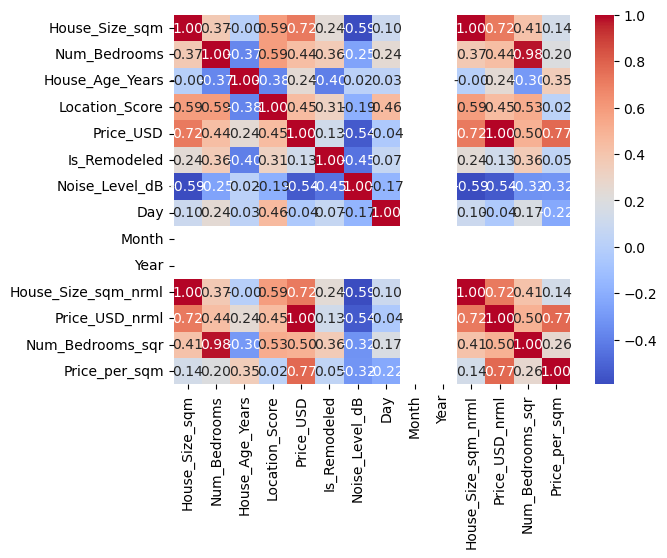

In [13]:
# Modeldeki alanların korelasyonlarına bakalım.
import seaborn as sns

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')

In [14]:
# Fiyat tahmini yapılacak bir modelde bu alanla diğer alanların korelasyonuna bakalım

abs(df.corr(numeric_only=True)['Price_USD']).sort_values(ascending=False) #Fiyat alanının diğer alanlarla korelasyonunu sıralı olarak ver

Price_USD              1.000000
Price_USD_nrml         1.000000
Price_per_sqm          0.770874
House_Size_sqm         0.716038
House_Size_sqm_nrml    0.716038
Noise_Level_dB         0.537970
Num_Bedrooms_sqr       0.496897
Location_Score         0.447327
Num_Bedrooms           0.440022
House_Age_Years        0.241532
Is_Remodeled           0.125139
Day                    0.042916
Month                       NaN
Year                        NaN
Name: Price_USD, dtype: float64

<font color="red"> İpucu:</font> Özellikl seçiminde %90 üzeri korelasyona sahip alanlar hedef alanı temsil ettiği için (birebir aynı özellikte olması modelin yanıltıcı bir yüksek performansa sahip olmasına neden olur), %20 altı alanlar da etki oranı çok düşük olduğu için modele dahil edilmez

In [15]:
# Price_per_sqm alanı kombinasyon işlemi ile fiyat alanından elde edildiği için fiyat tahmininde kullanılamaz!
# House_Size_sqm alanı normalize edildiği için bunun yerine House_Size_sqm_nrml alanı kullanıldı
# Num_Bedrooms alanının karesi alınarak Num_Bedrooms_sqr alanı oluşturuldu, modelde bu alan kullanıldı
# Diğer alanlar %20'nin altında kaldığı için kullanılmadı

x=df[["House_Size_sqm_nrml", "Noise_Level_dB", "Num_Bedrooms_sqr", "Location_Score", "House_Age_Years"]]
y=df[["Price_USD"]]

# Son Söz

Bu projede Özellik Mühendisliği örnekleri uyguladık. Bunlar aşağıdaki başlıklar altında verildi:
* Özellik Çıkartma (Feature Extraction)
* Özellik Dönüştürme (Feature Transformation)
* Dönüşüm Özellikleri (Polynomial Features)
* Kombinasyon Özellikleri (Combination Features)
* Özellik Seçimi (Feature Selection)

Veri setinde bulunan alanların özelliklerine göre ve içerdiği değerlere göre daha farklı işlemler uygulanabilir. Bir alandaki veriyi daha anlamlı, daha işlevsel nasıl kullanılabilir diye çeşitli denemeler yaparak modelin başarısı test edilebilir.